### Decision Tree Part 2

### 1. Tree Depth

Tree depth = how many questions (levels) your decision tree asks before making a final decision (leaf).

A deep tree → asks too many questions → fits training data too perfectly (overfitting).

A shallow tree → asks very few questions → may miss important patterns (underfitting).

👉 Example:

Depth = 1 → only asks “Weather = Hot/Cold?” → very simple.

Depth = 10 → asks many small questions → might even fit noise (like memorizing training data).


### 2. Pruning

Pruning = cutting back the tree to avoid overfitting.

Think of it like trimming a plant 🌱 so it doesn’t grow wild.

Ways to prune:

Limit depth → max_depth=3 (don’t let it grow too deep).

Minimum samples → each leaf must have at least n samples (min_samples_leaf).

Remove weak branches → cut splits that don’t improve accuracy much.

### Why pruning is important?

Without pruning → tree memorizes training data → fails on new data.

With pruning → tree generalizes better → works well on unseen data.

### ✅ In short:

Tree depth controls how complex the tree becomes.

Pruning is the method to prevent overfitting by cutting or limiting the tree.

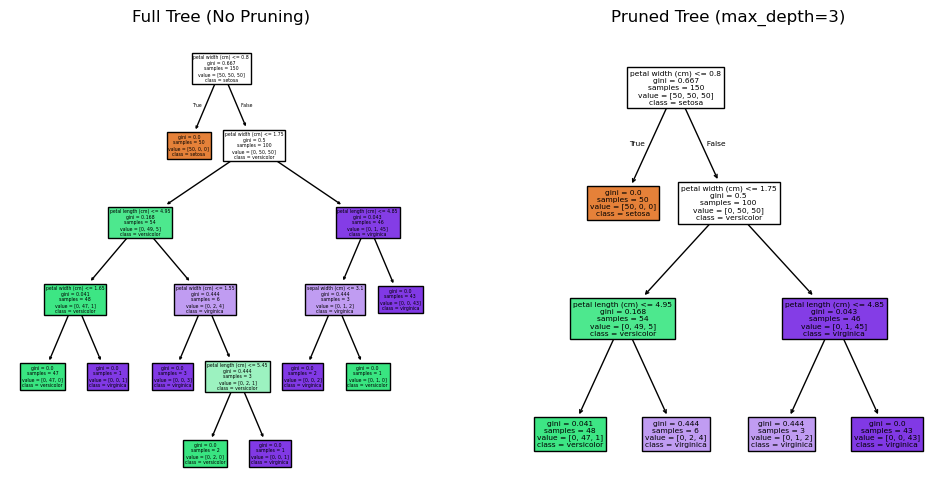

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample data (iris flower dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Model 1: No pruning (deep tree)
tree_full = DecisionTreeClassifier(random_state=0)
tree_full.fit(X, y)

# Model 2: With pruning (max_depth=3, min_samples_split=4)
tree_pruned = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=0)
tree_pruned.fit(X, y)

# Compare trees visually
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_tree(tree_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Full Tree (No Pruning)")

plt.subplot(1, 2, 2)
plot_tree(tree_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Pruned Tree (max_depth=3)")

plt.show()


### ✅ Pros (Advantages)

Easy to understand & interpret

Looks like a flowchart of questions → even non-technical people can follow.

No need for feature scaling

Works fine with raw data (no need to normalize or standardize).

Handles both numbers & categories

Can work with numerical values (age, salary) and categorical values (weather = sunny, rainy).

Captures non-linear patterns

Can split in many ways, not restricted to straight lines.

Fast predictions

Just follow the branches until a leaf is reached → quick decision.

### ❌ Cons (Disadvantages)

Overfitting

If the tree is too deep, it memorizes the training data.

Unstable

Small changes in data can create a very different tree.

Biased towards features with many categories

Example: A feature like "zip code" (lots of unique values) may dominate splits.

Not best for accuracy alone

Ensemble methods (Random Forest, Gradient Boosting) usually perform better.

### Great 👍 Let’s take a real-world example:

Example: Loan Approval System 🏦

A bank wants to decide whether to approve a loan.
They use a Decision Tree with features like:

Age

Income

Credit Score

Loan Amount

Employment Type

✅ Pros in this case:

Easy to explain → Bank manager can show:

“If Credit Score > 700 and Income > ₹50,000 → Approve Loan.”

“If Credit Score < 500 → Reject Loan.”
Even a non-technical officer can understand.

Handles categories →

Employment type (Salaried, Business, Student) can directly be used.

Fast decision →

Just follow the branches, quick approval/rejection.

❌ Cons in this case:

Overfitting →

If the tree grows too deep, it might say:
“Approve only if Age = 29, Income = ₹52,345, Credit Score = 721.”
(That’s memorizing instead of generalizing).

Unstable →

If we add/remove just 1–2 loan applications in data, the whole tree may look different.

Bias towards large categories →

Suppose we include "City" with 100 unique values → the tree may split on "City" first, even if it’s not very important.

👉 That’s why in real life, banks don’t just use one decision tree.
They use Random Forest (many trees combined) or XGBoost for stable and accurate predictions.

### 🌳 What is Feature Importance?

In a decision tree, at each split, the algorithm chooses the best feature to divide the data (like Age, Income, Credit Score).

Some features are used more often and reduce impurity (Gini/Entropy) more → these are more important.

The model can then tell us which features matter most in making predictions.

✅ Example: Titanic Survival 🛳️

Features:

Age

Sex

Passenger Class (1st, 2nd, 3rd)

Fare

A decision tree model may say:

Sex = most important (women had higher survival).

Passenger Class = second important (1st class > 3rd class).

Age = less important.

Fare = very small role.

So feature importance might look like:

Sex: 0.45
Passenger Class: 0.30
Age: 0.20
Fare: 0.05


This means 45% of the decision power came from "Sex".

pclass: 0.23
age: 0.08
fare: 0.12
sex_male: 0.58


/var/folders/rx/bfj9nybj02jf94xlvrjnp9nr0000gn/T/ipykernel_5977/3408071052.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["age"].fillna(X["age"].median(), inplace=True)
/var/folders/rx/bfj9nybj02jf94xlvrjnp9nr0000gn/T/ipykernel_5977/3408071052.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"].fillna(X["age"].median(), inpla

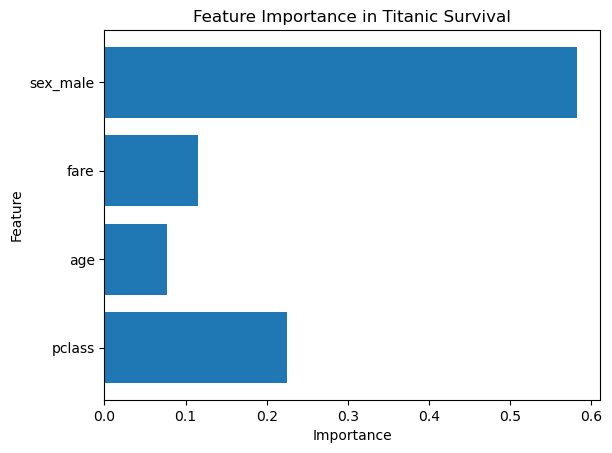

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load Titanic dataset (from seaborn for simplicity)
import seaborn as sns
titanic = sns.load_dataset("titanic")

# Select features and target
X = titanic[["pclass", "age", "sex", "fare"]]
y = titanic["survived"]

# Handle missing values
X["age"].fillna(X["age"].median(), inplace=True)

# Convert categorical (sex) → numeric
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Show results
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.2f}")

# Plot feature importance
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Titanic Survival")
plt.show()



/var/folders/rx/bfj9nybj02jf94xlvrjnp9nr0000gn/T/ipykernel_5977/4067162659.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["age"].fillna(X["age"].median(), inplace=True)
/var/folders/rx/bfj9nybj02jf94xlvrjnp9nr0000gn/T/ipykernel_5977/4067162659.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age"].fillna(X["age"].median(), inpla

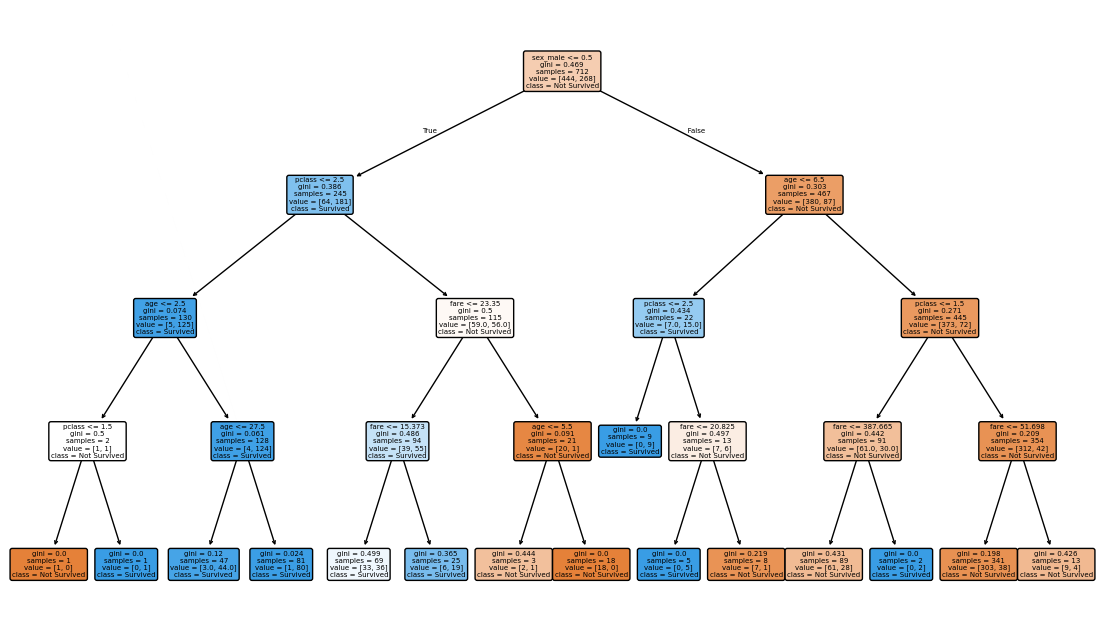

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Select features and target
X = titanic[["pclass", "age", "sex", "fare"]]
y = titanic["survived"]

# Handle missing values
X["age"].fillna(X["age"].median(), inplace=True)

# Convert categorical (sex) → numeric
X = pd.get_dummies(X, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 🎯 Plot the decision tree
plt.figure(figsize=(14, 8))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=["Not Survived", "Survived"], 
          filled=True, rounded=True)
plt.show()
